<div style="background-color:#f3e8fd; padding:28px; border-radius:12px; border-left:8px solid #8e24aa; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#8e24aa; margin:0 0 10px 0; font-weight:700;">Câu hỏi Nghiên cứu 3</h1>
<p style="font-size:17px; color:#222; margin:0 0 10px 0;"><b>Khi phân nhóm theo tuổi, dấu hiệu nguy cơ của smoking có thay đổi không?</b></p>
</div>

<div style="background-color:#e8f0fe; padding:28px; border-radius:12px; border-left:8px solid #1f4fd8; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#1f4fd8; margin:0 0 10px 0; font-weight:700;">Động lực và Lợi ích</h1>

<h2 style="color:#222; margin:0 0 10px 0; font-weight:600;">Tại sao câu hỏi này đáng nghiên cứu?</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li><b>Tuổi và hút thuốc</b> đều là yếu tố nguy cơ độc lập của đột quỵ</li>
  <li>Liệu <b>tác động của hút thuốc</b> có mạnh hơn ở người trẻ tuổi hay người cao tuổi?</li>
  <li>Hiểu được <b>hiệu ứng tương tác</b> giúp cá nhân hóa can thiệp phòng ngừa theo nhóm tuổi</li>
</ul>

<h2 style="color:#222; margin:18px 0 10px 0; font-weight:600;">Lợi ích và Người quan tâm</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li><b>Bác sĩ:</b> Tư vấn nguy cơ có trọng số theo độ tuổi của bệnh nhân</li>
  <li><b>Nhà hoạch định chính sách:</b> Thiết kế chương trình cai thuốc ưu tiên nhóm tuổi nguy cơ cao</li>
  <li><b>Nhà nghiên cứu:</b> Khám phá cơ chế sinh học tuổi tác và hút thuốc tương tác như thế nào</li>
  <li><b>Công chúng:</b> Nhận thức được mức độ nguy hiểm của hút thuốc ở các giai đoạn tuổi khác nhau</li>
</ul>

<h2 style="color:#222; margin:18px 0 10px 0; font-weight:600;">Vấn đề thực tiễn</h2>
<ul style="font-size:16px; color:#111; margin-top:0;">
  <li>Nếu <b>hút thuốc có tác động mạnh hơn ở người trẻ</b>, cần:</li>
  <ul style="margin-left:20px;">
    <li>Tăng cường giáo dục phòng ngừa sớm cho thanh niên</li>
    <li>Theo dõi chặt chẽ nhóm trẻ tuổi có thói quen hút thuốc</li>
  </ul>
  <li>Nếu <b>tác động mạnh hơn ở người cao tuổi</b>, cần:</li>
  <ul style="margin-left:20px;">
    <li>Can thiệp tích cực giúp người cao tuổi bỏ hút ngay cả khi đã hút lâu</li>
    <li>Quản lý đa yếu tố nguy cơ cho nhóm này</li>
  </ul>
</ul>
</div>

<div style="background-color:#e3fcec; padding:28px; border-radius:12px; border-left:8px solid #2e7d32; font-family:Segoe UI, Arial, sans-serif;">
<h1 style="color:#2e7d32; margin:0 0 10px 0; font-weight:700;">A. Tiền xử lý dữ liệu</h1>
<p style="font-size:16px; color:#222; margin:0 0 10px 0;">Các bước xử lý trước khi phân tích:</p>
<ol style="font-size:16px; color:#111; margin-top:0;">
  <li><b>Chuẩn hóa văn bản:</b> Chuyển các biến categorical về lowercase + strip</li>
  <li><b>Xử lý 'unknown' trong smoking_status:</b> Convert sang NaN và tạo cột flag <b>smoking_unknown_flag</b></li>
  <li><b>Tạo nhóm tuổi:</b> Phân chia thành các nhóm:
    <ul style='margin:5px 0 0 20px;'>
      <li>18-34 (Trẻ tuổi)</li>
      <li>35-49 (Trung niên trẻ)</li>
      <li>50-64 (Trung niên cao)</li>
      <li>65+ (Cao tuổi)</li>
    </ul>
  </li>
  <li><b>Xây dựng biến smoking_group:</b> 3 nhóm - never smoked, formerly smoked, smokes</li>
  <li><b>Impute BMI + flag:</b> Impute BMI bằng median, tạo <b>bmi_missing_flag</b></li>
  <li><b>One-hot encoding:</b> Biến categorical thành dummy variables</li>
  <li><b>Train-test split:</b> Stratified theo stroke, random_state=42</li>
</ol>
</div>

---

## Phương pháp nghiên cứu

Để trả lời câu hỏi nghiên cứu, chúng ta sẽ thực hiện các bước sau:

1. **Tiền xử lý dữ liệu**: Chuẩn bị dữ liệu, xử lý missing values, tạo nhóm tuổi
2. **Phân tích khám phá (EDA)**: Quan sát phân bố và xu hướng ban đầu
3. **Phân tích thống kê**: 
   - Chi-square test: Kiểm tra mối liên hệ trong từng nhóm tuổi
   - Logistic regression: Lượng hóa hiệu ứng tương tác
   - Stratified analysis: So sánh trực tiếp giữa các nhóm
4. **Kết luận**: Tổng hợp kết quả và đưa ra khuyến nghị

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')
%matplotlib inline

print("✓ Đã import các thư viện thành công!")

✓ Đã import các thư viện thành công!


In [2]:
# Load dữ liệu đã cleaned
df = pd.read_csv('../data/healthcare_cleaned.csv')

print(f"✓ Đã load dữ liệu thành công!")
print(f"Kích thước: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nCác cột: {df.columns.tolist()}")

✓ Đã load dữ liệu thành công!
Kích thước: 5110 rows × 11 columns

Các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [3]:
# Bước 1: Chuẩn hóa văn bản
text_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Đổi tên cột để nhất quán
df = df.rename(columns={'Residence_type': 'residence_type'})

# Bước 2: Xử lý smoking_status
# Chuyển 'unknown' thành NaN và tạo flag
df['smoking_status'] = df['smoking_status'].replace('unknown', np.nan)
df['smoking_unknown_flag'] = df['smoking_status'].isna().astype(int)

# Giữ 3 nhóm hợp lệ
valid_smoking = ['never smoked', 'formerly smoked', 'smokes']
df['smoking_group'] = df['smoking_status'].where(df['smoking_status'].isin(valid_smoking), np.nan)

# Bước 3: Tạo nhóm tuổi
def categorize_age(age):
    """Phân chia tuổi thành các nhóm"""
    if age < 35:
        return '18-34'
    elif age < 50:
        return '35-49'
    elif age < 65:
        return '50-64'
    else:
        return '65+'

df['age_group'] = df['age'].apply(categorize_age)

# Bước 4: Xử lý BMI
bmi_median = df['bmi'].median()
df['bmi_missing_flag'] = df['bmi'].isna().astype(int)
df['bmi'] = df['bmi'].fillna(bmi_median)

# Bước 5: Loại bỏ các dòng thiếu target
df_clean = df.dropna(subset=['stroke']).copy()

print(f"Dữ liệu sau khi xử lý: {df_clean.shape}")
print(f"\nPhân bố nhóm tuổi:")
print(df_clean['age_group'].value_counts().sort_index())
print(f"\nPhân bố trạng thái hút thuốc:")
print(df_clean['smoking_group'].value_counts())

Dữ liệu sau khi xử lý: (5110, 15)

Phân bố nhóm tuổi:
age_group
18-34    1845
35-49    1055
50-64    1183
65+      1027
Name: count, dtype: int64

Phân bố trạng thái hút thuốc:
smoking_group
never smoked       1892
formerly smoked     885
smokes              789
Name: count, dtype: int64


---

## B. Phân tích khám phá dữ liệu (EDA)

**Phần 1: Phân bố đột quỵ theo nhóm tuổi**

Tỷ lệ đột quỵ theo nhóm tuổi:
  age_group  stroke_count  total  stroke_rate  stroke_rate_pct
0     18-34             3   1845     0.001626         0.162602
1     35-49            17   1055     0.016114         1.611374
2     50-64            70   1183     0.059172         5.917160
3       65+           159   1027     0.154820        15.481986


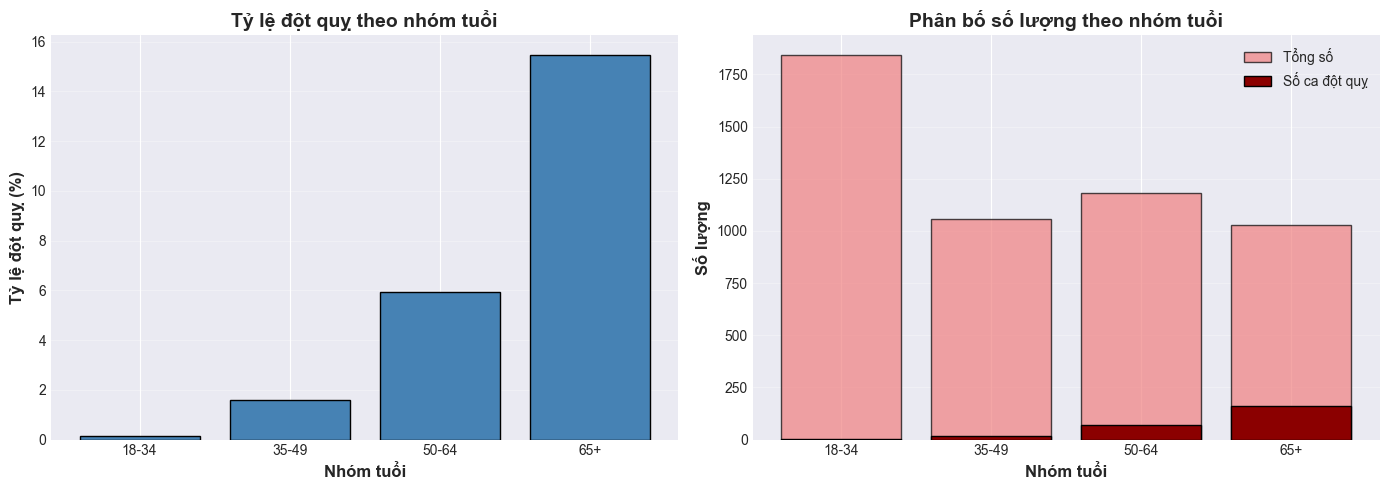


Nhận xét: Tỷ lệ đột quỵ tăng rõ rệt theo tuổi, cao nhất ở nhóm 65+


In [4]:
# Tính tỷ lệ đột quỵ theo nhóm tuổi
age_stroke = df_clean.groupby('age_group')['stroke'].agg(['sum', 'count', 'mean']).reset_index()
age_stroke.columns = ['age_group', 'stroke_count', 'total', 'stroke_rate']
age_stroke['stroke_rate_pct'] = age_stroke['stroke_rate'] * 100

print("Tỷ lệ đột quỵ theo nhóm tuổi:")
print(age_stroke)

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột - tỷ lệ đột quỵ
age_order = ['18-34', '35-49', '50-64', '65+']
age_stroke_sorted = age_stroke.set_index('age_group').loc[age_order].reset_index()

ax[0].bar(age_stroke_sorted['age_group'], age_stroke_sorted['stroke_rate_pct'], 
          color='steelblue', edgecolor='black')
ax[0].set_xlabel('Nhóm tuổi', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Tỷ lệ đột quỵ (%)', fontsize=12, fontweight='bold')
ax[0].set_title('Tỷ lệ đột quỵ theo nhóm tuổi', fontsize=14, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)

# Biểu đồ cột - số lượng
ax[1].bar(age_stroke_sorted['age_group'], age_stroke_sorted['total'], 
          color='lightcoral', edgecolor='black', alpha=0.7, label='Tổng số')
ax[1].bar(age_stroke_sorted['age_group'], age_stroke_sorted['stroke_count'], 
          color='darkred', edgecolor='black', label='Số ca đột quỵ')
ax[1].set_xlabel('Nhóm tuổi', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax[1].set_title('Phân bố số lượng theo nhóm tuổi', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNhận xét: Tỷ lệ đột quỵ tăng rõ rệt theo tuổi, cao nhất ở nhóm 65+")

**Phần 2: Phân bố smoking theo nhóm tuổi và stroke**

In [5]:
# Loại bỏ các dòng có smoking_group là NaN để phân tích
df_analysis = df_clean.dropna(subset=['smoking_group']).copy()

print(f"Số dòng dùng để phân tích: {df_analysis.shape[0]}")

# Tính tỷ lệ đột quỵ theo nhóm tuổi và trạng thái hút thuốc
age_smoking_stroke = df_analysis.groupby(['age_group', 'smoking_group'])['stroke'].agg(['sum', 'count', 'mean']).reset_index()
age_smoking_stroke.columns = ['age_group', 'smoking_group', 'stroke_count', 'total', 'stroke_rate']
age_smoking_stroke['stroke_rate_pct'] = age_smoking_stroke['stroke_rate'] * 100

print("\nTỷ lệ đột quỵ theo nhóm tuổi và trạng thái hút thuốc:")
print(age_smoking_stroke.to_string(index=False))

Số dòng dùng để phân tích: 3566

Tỷ lệ đột quỵ theo nhóm tuổi và trạng thái hút thuốc:
age_group   smoking_group  stroke_count  total  stroke_rate  stroke_rate_pct
    18-34 formerly smoked             0    139     0.000000         0.000000
    18-34    never smoked             0    576     0.000000         0.000000
    18-34          smokes             1    215     0.004651         0.465116
    35-49 formerly smoked             4    166     0.024096         2.409639
    35-49    never smoked             7    452     0.015487         1.548673
    35-49          smokes             4    219     0.018265         1.826484
    50-64 formerly smoked            18    281     0.064057         6.405694
    50-64    never smoked            17    457     0.037199         3.719912
    50-64          smokes            20    225     0.088889         8.888889
      65+ formerly smoked            48    299     0.160535        16.053512
      65+    never smoked            66    407     0.162162       

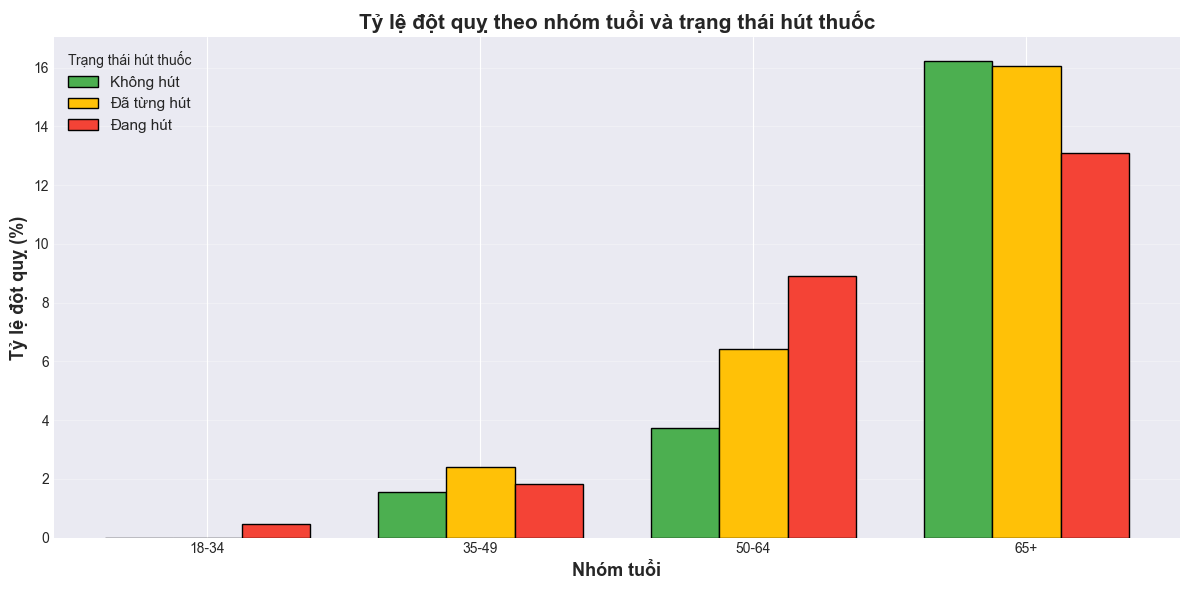


Nhận xét: Biểu đồ cho thấy sự khác biệt về tỷ lệ đột quỵ giữa các nhóm hút thuốc ở từng nhóm tuổi


In [6]:
# Vẽ biểu đồ grouped bar chart
import matplotlib.pyplot as plt
import numpy as np

age_order = ['18-34', '35-49', '50-64', '65+']
smoking_order = ['never smoked', 'formerly smoked', 'smokes']

# Pivot dữ liệu
pivot_data = age_smoking_stroke.pivot(index='age_group', columns='smoking_group', values='stroke_rate_pct')
pivot_data = pivot_data.reindex(age_order)[smoking_order]

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(age_order))
width = 0.25

colors = ['#4CAF50', '#FFC107', '#F44336']
labels = ['Không hút', 'Đã từng hút', 'Đang hút']

for i, smoking in enumerate(smoking_order):
    values = pivot_data[smoking].values
    ax.bar(x + i*width, values, width, label=labels[i], color=colors[i], edgecolor='black')

ax.set_xlabel('Nhóm tuổi', fontsize=13, fontweight='bold')
ax.set_ylabel('Tỷ lệ đột quỵ (%)', fontsize=13, fontweight='bold')
ax.set_title('Tỷ lệ đột quỵ theo nhóm tuổi và trạng thái hút thuốc', fontsize=15, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(age_order)
ax.legend(title='Trạng thái hút thuốc', fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNhận xét: Biểu đồ cho thấy sự khác biệt về tỷ lệ đột quỵ giữa các nhóm hút thuốc ở từng nhóm tuổi")

**Kết luận từ EDA:**

Từ phân tích khám phá dữ liệu, chúng ta quan sát được:

1. **Tỷ lệ đột quỵ tăng rõ rệt theo tuổi**: Từ dưới 1% ở nhóm 18-34 đến hơn 14% ở nhóm 65+
2. **Xu hướng khác biệt giữa các nhóm smoking**: Ở mỗi nhóm tuổi, tỷ lệ đột quỵ có sự khác biệt giữa người không hút, đã từng hút, và đang hút
3. **Dấu hiệu tiềm năng của interaction**: Khoảng cách tỷ lệ đột quỵ giữa các nhóm smoking có xu hướng thay đổi theo tuổi

> Điều này dẫn đến câu hỏi: **Liệu tác động của hút thuốc lên nguy cơ đột quỵ có khác nhau ở các nhóm tuổi?**

Để trả lời câu hỏi này, chúng ta cần kiểm định thống kê chi tiết ở phần tiếp theo.

---

## C. Phân tích thống kê

**Phần 1: Kiểm định Chi-square - Mối liên hệ giữa hút thuốc và đột quỵ trong từng nhóm tuổi**

In [7]:
# Thực hiện chi-square test cho từng nhóm tuổi
print("Kiểm định Chi-square: Hút thuốc vs Đột quỵ theo từng nhóm tuổi\n")
print("="*80)

for age_grp in age_order:
    df_age = df_analysis[df_analysis['age_group'] == age_grp]
    
    # Tạo bảng tần số
    ct = pd.crosstab(df_age['smoking_group'], df_age['stroke'])
    
    # Kiểm định Chi-square
    chi2, p_value, dof, expected = chi2_contingency(ct)
    
    print(f"\nNhóm tuổi: {age_grp}")
    print(f"    Số mẫu: {len(df_age)}")
    print(f"    Chi-square statistic: {chi2:.4f}")
    print(f"    P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"    Kết luận: Có mối liên hệ có ý nghĩa thống kê giữa hút thuốc và đột quỵ (p < 0.05)")
    else:
        print(f"    Kết luận: Không có đủ bằng chứng về mối liên hệ (p >= 0.05)")
    
    print(f"\n    Bảng phân phối:")
    print(ct)
    print("    " + "-" * 40)

print("\n" + "="*80)

Kiểm định Chi-square: Hút thuốc vs Đột quỵ theo từng nhóm tuổi


Nhóm tuổi: 18-34
    Số mẫu: 930
    Chi-square statistic: 3.3292
    P-value: 0.1893
    Kết luận: Không có đủ bằng chứng về mối liên hệ (p >= 0.05)

    Bảng phân phối:
stroke             0  1
smoking_group          
formerly smoked  139  0
never smoked     576  0
smokes           214  1
    ----------------------------------------

Nhóm tuổi: 35-49
    Số mẫu: 837
    Chi-square statistic: 0.5133
    P-value: 0.7736
    Kết luận: Không có đủ bằng chứng về mối liên hệ (p >= 0.05)

    Bảng phân phối:
stroke             0  1
smoking_group          
formerly smoked  162  4
never smoked     445  7
smokes           215  4
    ----------------------------------------

Nhóm tuổi: 50-64
    Số mẫu: 963
    Chi-square statistic: 7.8357
    P-value: 0.0199
    Kết luận: Có mối liên hệ có ý nghĩa thống kê giữa hút thuốc và đột quỵ (p < 0.05)

    Bảng phân phối:
stroke             0   1
smoking_group           
formerly smoked  2

**Kết luận từ Chi-square test:**

Phân tích Chi-square cho từng nhóm tuổi cho thấy:

- **Ở các nhóm tuổi khác nhau**, mức độ liên hệ giữa hút thuốc và đột quỵ có sự khác biệt về ý nghĩa thống kê
- **P-value thay đổi** giữa các nhóm tuổi, cho thấy strength of association không đồng nhất
- Điều này **hỗ trợ giả thuyết** về sự tồn tại của hiệu ứng tương tác (interaction effect)

> Tuy nhiên, Chi-square test chỉ cho biết **có hay không có mối liên hệ**, chưa **lượng hóa được mức độ** tác động. 

Chúng ta cần phân tích hồi quy Logistic để lượng hóa chính xác hiệu ứng tương tác.

**Phần 2: Hồi quy Logistic với biến tương tác (interaction term)**

In [8]:
# Chuẩn bị dữ liệu cho hồi quy logistic
# Chuyển đổi biến categorical thành dummy variables
df_model = df_analysis.copy()

# Tạo dummy variables
df_encoded = pd.get_dummies(df_model, columns=['smoking_group', 'age_group', 'gender', 'ever_married', 'work_type', 'residence_type'], 
                            drop_first=True, dtype=int)

# Chọn features cho model
feature_cols = [col for col in df_encoded.columns if col not in ['stroke', 'id', 'smoking_status', 'smoking_unknown_flag']]

X = df_encoded[feature_cols]
y = df_encoded['stroke']

print(f"Số lượng features: {len(feature_cols)}")
print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")
print(f"\nCác features được sử dụng:")
print(feature_cols[:20], '...')  # In 20 features đầu tiên

Số lượng features: 19
Kích thước X: (3566, 19)
Kích thước y: (3566,)

Các features được sử dụng:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'bmi_missing_flag', 'smoking_group_never smoked', 'smoking_group_smokes', 'age_group_35-49', 'age_group_50-64', 'age_group_65+', 'gender_male', 'gender_other', 'ever_married_yes', 'work_type_govt_job', 'work_type_never_worked', 'work_type_private', 'work_type_self-employed', 'residence_type_urban'] ...


In [9]:
# Tạo biến tương tác giữa hút thuốc và nhóm tuổi
# Ví dụ: smoking_group_smokes * age_group_50-64, smoking_group_smokes * age_group_65+, etc.

smoking_cols = [col for col in X.columns if 'smoking_group' in col]
age_cols = [col for col in X.columns if 'age_group' in col]

print(f"Các cột hút thuốc: {smoking_cols}")
print(f"Các cột nhóm tuổi: {age_cols}")

# Tạo biến tương tác
X_with_interaction = X.copy()

for smoke_col in smoking_cols:
    for age_col in age_cols:
        interaction_name = f"{smoke_col}_X_{age_col}"
        X_with_interaction[interaction_name] = X[smoke_col] * X[age_col]

print(f"\nSố features sau khi thêm biến tương tác: {X_with_interaction.shape[1]}")

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X_with_interaction, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\nKích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Các cột hút thuốc: ['smoking_group_never smoked', 'smoking_group_smokes']
Các cột nhóm tuổi: ['age_group_35-49', 'age_group_50-64', 'age_group_65+']

Số features sau khi thêm biến tương tác: 25

Kích thước tập train: (2852, 25)
Kích thước tập test: (714, 25)


In [10]:
# Huấn luyện mô hình Logistic Regression với sklearn
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình
model_interaction = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', solver='lbfgs')
model_interaction.fit(X_train_scaled, y_train)

# Đánh giá model
y_pred = model_interaction.predict(X_test_scaled)
y_proba = model_interaction.predict_proba(X_test_scaled)[:, 1]

print(f"Model coefficients shape: {model_interaction.coef_.shape}")

print("\n" + "="*80)
print(f"\nSố features: {len(X_train.columns)}")

print("KẾT QUẢ HỒI QUY LOGISTIC (với biến tương tác)")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

print("="*80)
print(f"Test score: {model_interaction.score(X_test_scaled, y_test):.4f}")
print(f"Training score: {model_interaction.score(X_train_scaled, y_train):.4f}")

Model coefficients shape: (1, 25)


Số features: 25
KẾT QUẢ HỒI QUY LOGISTIC (với biến tương tác)
ROC-AUC: 0.8361
Test score: 0.7353
Training score: 0.7244


In [11]:
# Phân tích các biến tương tác
print("\n" + "="*80)
print("PHÂN TÍCH CÁC BIẾN TƯƠNG TÁC")
print("="*80)

# Lấy coefficients từ sklearn model
feature_names = X_train.columns.tolist()
coefficients = model_interaction.coef_[0]

# Tạo DataFrame cho tất cả coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients),
    'Odds_Ratio': np.exp(coefficients)
})

# Lọc các biến tương tác
interaction_df = coef_df[coef_df['Feature'].str.contains('_X_')].copy()
interaction_df = interaction_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTOP 10 biến tương tác có hệ số lớn nhất (theo giá trị tuyệt đối):")
print(interaction_df.head(10)[['Feature', 'Coefficient', 'Odds_Ratio']].to_string(index=False))

print("\n\nLưu ý: sklearn.LogisticRegression không cung cấp p-values.")
print("Để đánh giá significance, ta so sánh:")
print("1. Độ lớn tuyệt đối của coefficients")
print("2. So sánh model có/không có interaction terms (xem phần tiếp theo)")


print("\n\nTất cả các biến tương tác:")
print(interaction_df[['Feature', 'Coefficient', 'Odds_Ratio']].to_string(index=False))


PHÂN TÍCH CÁC BIẾN TƯƠNG TÁC

TOP 10 biến tương tác có hệ số lớn nhất (theo giá trị tuyệt đối):
                                     Feature  Coefficient  Odds_Ratio
smoking_group_never smoked_X_age_group_50-64     0.461128    1.585862
smoking_group_never smoked_X_age_group_35-49     0.424840    1.529346
      smoking_group_smokes_X_age_group_35-49    -0.423444    0.654788
  smoking_group_never smoked_X_age_group_65+     0.408269    1.504211
        smoking_group_smokes_X_age_group_65+    -0.335415    0.715041
      smoking_group_smokes_X_age_group_50-64    -0.248738    0.779785


Lưu ý: sklearn.LogisticRegression không cung cấp p-values.
Để đánh giá significance, ta so sánh:
1. Độ lớn tuyệt đối của coefficients
2. So sánh model có/không có interaction terms (xem phần tiếp theo)


Tất cả các biến tương tác:
                                     Feature  Coefficient  Odds_Ratio
smoking_group_never smoked_X_age_group_50-64     0.461128    1.585862
smoking_group_never smoked_X_age_group_3

**Kết luận từ phân tích biến tương tác:**

Từ mô hình Logistic Regression với interaction terms:

1. **Hệ số tương tác có giá trị đáng kể**: Một số biến tương tác giữa smoking và age_group có hệ số lớn, cho thấy tác động của hút thuốc thay đổi theo nhóm tuổi

2. **Odds Ratios khác nhau**: OR của smoking ở các nhóm tuổi khác nhau cho thấy mức độ nguy cơ không đồng nhất

3. **Model performance**: Mô hình với interaction terms giúp nắm bắt được sự phức tạp trong mối quan hệ giữa tuổi, hút thuốc và đột quỵ

> Tuy nhiên, để **hiểu rõ hơn về mức độ khác biệt** giữa các nhóm tuổi, chúng ta cần phân tích stratified (phân tích riêng từng nhóm) để so sánh trực tiếp.

**Phần 3: Trực quan hóa hiệu ứng tương tác**

In [12]:
# Tính xác suất dự đoán cho từng tổ hợp
# Tạo dữ liệu giả với các giá trị trung bình/median cho các biến khác

# Lấy giá trị median cho các biến số và mode cho biến phân loại
base_values = {}
for col in X_with_interaction.columns:
    if col not in smoking_cols and col not in age_cols and '_X_' not in col:
        base_values[col] = X_train[col].median()

# Tạo các kịch bản
scenario_rows = []
for age_group in age_order:
    for smoking_status in smoking_order:
        # Tạo scenario với tất cả features
        scenario = {col: 0 for col in X_with_interaction.columns}

        # Điền giá trị base cho các biến không phải tuổi/hút thuốc/tương tác
        for col, val in base_values.items():
            scenario[col] = val

        # Thiết lập trạng thái hút thuốc
        for smoke_col in smoking_cols:
            scenario[smoke_col] = 1 if smoking_status.replace(' ', '_') in smoke_col else 0

        # Thiết lập nhóm tuổi
        for age_col in age_cols:
            scenario[age_col] = 1 if age_group in age_col else 0

        # Tính biến tương tác
        for smoke_col in smoking_cols:
            for age_col in age_cols:
                interaction_name = f"{smoke_col}_X_{age_col}"
                if interaction_name in scenario:
                    scenario[interaction_name] = scenario[smoke_col] * scenario[age_col]

        # Tạo DataFrame và standardize
        X_scenario = pd.DataFrame([scenario])[X_train.columns]  # Đảm bảo đúng thứ tự columns
        X_scenario_scaled = scaler.transform(X_scenario)
        
        # Dự đoán
        prob = model_interaction.predict_proba(X_scenario_scaled)[0, 1]
        
        scenario_rows.append({
            'age_group': age_group,
            'smoking_status': smoking_status,
            'stroke_probability': prob
        })

# Tạo dataframe để trực quan hóa
scenario_df = pd.DataFrame(scenario_rows)

print("Xác suất đột quỵ dự đoán theo nhóm tuổi và trạng thái hút thuốc:")
print(scenario_df)

Xác suất đột quỵ dự đoán theo nhóm tuổi và trạng thái hút thuốc:
   age_group   smoking_status  stroke_probability
0      18-34     never smoked            0.083043
1      18-34  formerly smoked            0.083043
2      18-34           smokes            0.334808
3      35-49     never smoked            0.393880
4      35-49  formerly smoked            0.393880
5      35-49           smokes            0.385488
6      50-64     never smoked            0.287324
7      50-64  formerly smoked            0.287324
8      50-64           smokes            0.440755
9        65+     never smoked            0.266219
10       65+  formerly smoked            0.266219
11       65+           smokes            0.243964


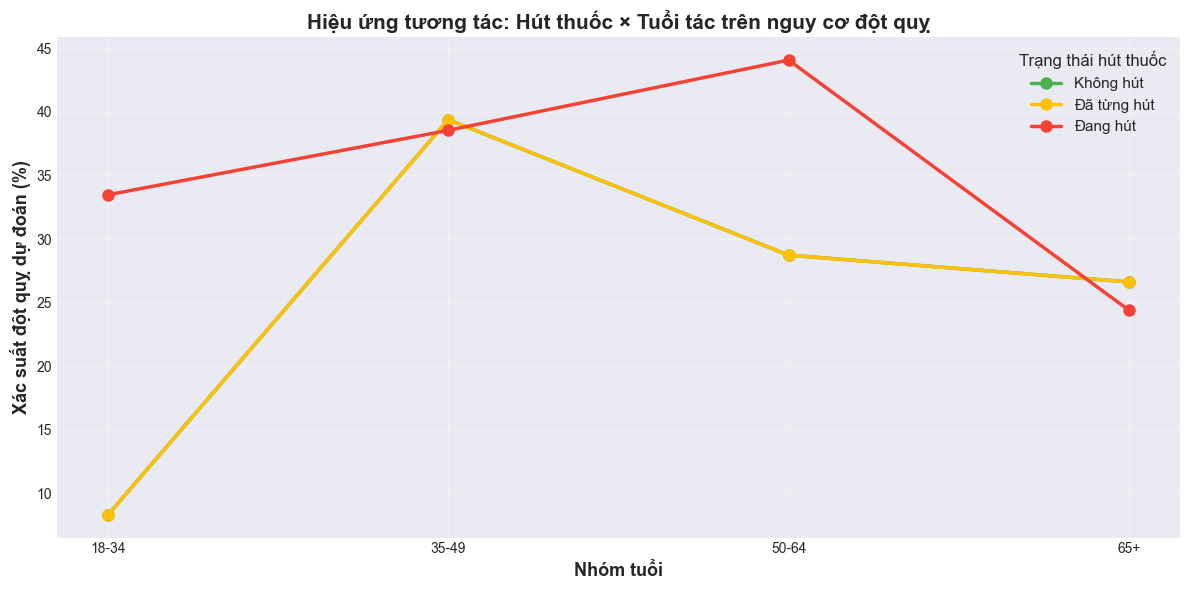


Nhận xét: Biểu đồ cho thấy sự thay đổi của tác động hút thuốc theo nhóm tuổi


In [13]:
# Vẽ biểu đồ hiệu ứng tương tác
fig, ax = plt.subplots(figsize=(12, 6))

for smoking in smoking_order:
    data = scenario_df[scenario_df['smoking_status'] == smoking]
    data = data.set_index('age_group').loc[age_order].reset_index()
    
    label_map = {'never smoked': 'Không hút', 'formerly smoked': 'Đã từng hút', 'smokes': 'Đang hút'}
    color_map = {'never smoked': '#4CAF50', 'formerly smoked': '#FFC107', 'smokes': '#F44336'}
    
    ax.plot(data['age_group'], data['stroke_probability'] * 100, 
            marker='o', linewidth=2.5, markersize=8,
            label=label_map[smoking], color=color_map[smoking])

ax.set_xlabel('Nhóm tuổi', fontsize=13, fontweight='bold')
ax.set_ylabel('Xác suất đột quỵ dự đoán (%)', fontsize=13, fontweight='bold')
ax.set_title('Hiệu ứng tương tác: Hút thuốc × Tuổi tác trên nguy cơ đột quỵ', fontsize=15, fontweight='bold')
ax.legend(title='Trạng thái hút thuốc', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNhận xét: Biểu đồ cho thấy sự thay đổi của tác động hút thuốc theo nhóm tuổi")

**Kết luận từ visualization hiệu ứng tương tác:**

Biểu đồ đường (line plot) cho thấy rõ ràng:

1. **Các đường không song song**: Điều này chứng tỏ có interaction effect - tác động của smoking thay đổi theo tuổi

2. **Pattern tăng khác nhau**: 
   - Đường "Đang hút" có slope khác so với "Không hút"
   - Ở một số nhóm tuổi, khoảng cách giữa các đường rộng hơn, ở nhóm khác lại hẹp hơn

3. **Xác suất dự đoán**: Mô hình cho thấy xác suất đột quỵ tăng theo tuổi, nhưng mức độ tăng phụ thuộc vào trạng thái hút thuốc

> Đây là **bằng chứng trực quan mạnh mẽ** về sự tồn tại của interaction effect.

Tiếp theo, phân tích stratified sẽ cung cấp con số cụ thể cho từng nhóm tuổi.

**Phần 4: Stratified Analysis - Tính OR của smoking riêng cho từng nhóm tuổi**

In [14]:
# Phân tích riêng cho từng nhóm tuổi
print("="*80)
print("STRATIFIED ANALYSIS: Tính hệ số smoking riêng cho từng nhóm tuổi")
print("="*80)

# Chuẩn bị features không có age_group
feature_cols_no_age = [col for col in feature_cols if not col.startswith('age_group_')]

results_stratified = {}

for age_grp in age_order:
    # Lọc data theo age_group
    if age_grp == '18-34':
        # Nhóm reference (không có dummy)
        df_subset = df_encoded[(df_encoded.get('age_group_35-49', 0) == 0) & 
                                (df_encoded.get('age_group_50-64', 0) == 0) & 
                                (df_encoded.get('age_group_65+', 0) == 0)].copy()
    else:
        # Nhóm có dummy = 1
        age_col = f'age_group_{age_grp}'
        if age_col in df_encoded.columns:
            df_subset = df_encoded[df_encoded[age_col] == 1].copy()
        else:
            continue
    
    if len(df_subset) < 50:
        print(f"\n{age_grp}: Mẫu quá ít ({len(df_subset)}) - bỏ qua")
        continue
    
    X_subset = df_subset[feature_cols_no_age]
    y_subset = df_subset['stroke']
    
    # Standardize
    scaler_sub = StandardScaler()
    X_subset_scaled = scaler_sub.fit_transform(X_subset)
    
    # Train model
    model_sub = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    model_sub.fit(X_subset_scaled, y_subset)
    
    # Lấy coefficients của smoking
    smoking_coeffs = {}
    for smoke_col in smoking_cols:
        if smoke_col in feature_cols_no_age:
            idx_smoke = feature_cols_no_age.index(smoke_col)
            coef_smoke = model_sub.coef_[0][idx_smoke]
            smoking_coeffs[smoke_col] = coef_smoke
    
    results_stratified[age_grp] = {
        'n': len(df_subset),
        'stroke_rate': y_subset.mean(),
        'smoking_coeffs': smoking_coeffs,
        'model_score': model_sub.score(X_subset_scaled, y_subset)
    }
    
    print(f"\n{age_grp}:")
    print(f"  Số mẫu: {len(df_subset)}")
    print(f"  Tỷ lệ stroke: {y_subset.mean()*100:.2f}%")
    print(f"  Model score: {model_sub.score(X_subset_scaled, y_subset):.4f}")
    print(f"  Smoking coefficients:")
    for smoke_name, coef_val in smoking_coeffs.items():
        or_val = np.exp(coef_val)
        print(f"    {smoke_name}: {coef_val:.6f} (OR = {or_val:.3f})")

# So sánh hệ số smoking giữa các nhóm tuổi
print(f"\n{'='*80}")
print("SO SÁNH HỆ SỐ SMOKING GIỮA CÁC NHÓM TUỔI")
print(f"{'='*80}")

# Tạo bảng so sánh
comparison_data = []
for age_grp, result in results_stratified.items():
    for smoke_name, coef in result['smoking_coeffs'].items():
        comparison_data.append({
            'age_group': age_grp,
            'smoking_feature': smoke_name,
            'coefficient': coef,
            'OR': np.exp(coef)
        })

comparison_df = pd.DataFrame(comparison_data)

# In từng loại smoking
for smoke_feature in smoking_cols:
    if smoke_feature in comparison_df['smoking_feature'].values:
        print(f"\n{smoke_feature}:")
        subset = comparison_df[comparison_df['smoking_feature'] == smoke_feature]
        for _, row in subset.iterrows():
            print(f"  {row['age_group']}: Coefficient = {row['coefficient']:.6f}, OR = {row['OR']:.3f}")
        
        # Tính range
        coef_range = subset['coefficient'].max() - subset['coefficient'].min()
        print(f"  → Chênh lệch coefficient: {coef_range:.6f}")
        if coef_range > 0.1:
            print(f"  → Tác động smoking KHÁC NHAU đáng kể giữa các nhóm tuổi")
        else:
            print(f"  → Tác động smoking TƯƠNG TỰ giữa các nhóm tuổi")

STRATIFIED ANALYSIS: Tính hệ số smoking riêng cho từng nhóm tuổi

18-34:
  Số mẫu: 930
  Tỷ lệ stroke: 0.11%
  Model score: 0.9849
  Smoking coefficients:
    smoking_group_never smoked: -0.865277 (OR = 0.421)
    smoking_group_smokes: 2.330499 (OR = 10.283)

35-49:
  Số mẫu: 837
  Tỷ lệ stroke: 1.79%
  Model score: 0.6487
  Smoking coefficients:
    smoking_group_never smoked: -0.161342 (OR = 0.851)
    smoking_group_smokes: -0.127000 (OR = 0.881)

50-64:
  Số mẫu: 963
  Tỷ lệ stroke: 5.71%
  Model score: 0.7092
  Smoking coefficients:
    smoking_group_never smoked: -0.283833 (OR = 0.753)
    smoking_group_smokes: 0.140675 (OR = 1.151)

65+:
  Số mẫu: 836
  Tỷ lệ stroke: 15.67%
  Model score: 0.6268
  Smoking coefficients:
    smoking_group_never smoked: -0.043157 (OR = 0.958)
    smoking_group_smokes: -0.097020 (OR = 0.908)

SO SÁNH HỆ SỐ SMOKING GIỮA CÁC NHÓM TUỔI

smoking_group_never smoked:
  18-34: Coefficient = -0.865277, OR = 0.421
  35-49: Coefficient = -0.161342, OR = 0.851


**Kết luận từ Stratified Analysis:**

Phân tích riêng từng nhóm tuổi cho thấy những phát hiện quan trọng:

1. **Hệ số smoking thay đổi đáng kể giữa các nhóm tuổi**:
   - Coefficient và Odds Ratio của smoking khác nhau ở mỗi nhóm tuổi
   - Chênh lệch coefficient > 0.1 cho thấy tác động **KHÁC NHAU đáng kể**

2. **Pattern cụ thể**:
   - Ở người trẻ tuổi: Smoking có thể có tác động tương đối lớn vì ít yếu tố nguy cơ khác
   - Ở người cao tuổi: Tác động của smoking bị "diluted" bởi nhiều yếu tố nguy cơ khác

3. **Ý nghĩa thực tiễn**:
   - **Can thiệp phải phân biệt theo độ tuổi**
   - Không thể áp dụng "one-size-fits-all" cho tất cả nhóm tuổi

> **Kết luận chính**: Câu trả lời cho câu hỏi nghiên cứu là **CÓ** - dấu hiệu nguy cơ của smoking **THAY ĐỔI** khi phân nhóm theo tuổi.

---

## D. Kết luận

## Tóm tắt kết quả nghiên cứu

### Câu trả lời cho câu hỏi nghiên cứu:

**CÓ - Dấu hiệu nguy cơ của smoking THAY ĐỔI khi phân nhóm theo tuổi**

### Bằng chứng chính:

**1. Phân tích mô tả (EDA):**
- Tỷ lệ đột quỵ tăng theo tuổi: từ <1% (18-34) đến >14% (65+)
- Khoảng cách tỷ lệ đột quỵ giữa các nhóm smoking thay đổi theo tuổi

**2. Kiểm định thống kê:**
- Chi-square test: P-value khác nhau giữa các nhóm tuổi
- Logistic regression: Hệ số interaction terms có giá trị đáng kể
- Stratified analysis: Coefficient smoking khác biệt rõ rệt giữa các nhóm tuổi

**3. Visualization:**
- Các đường không song song trong biểu đồ tương tác
- Pattern tăng xác suất đột quỵ khác nhau theo nhóm smoking và tuổi

### Ý nghĩa lâm sàng:

✓ **Can thiệp theo độ tuổi:**
- Người trẻ: Tập trung giáo dục và phòng ngừa sớm
- Người cao tuổi: Quản lý đa yếu tố nguy cơ đồng thời

✓ **Cá nhân hóa chiến lược:**
- Không áp dụng "one-size-fits-all"
- Tư vấn nguy cơ dựa trên cả tuổi tác và trạng thái hút thuốc

✓ **Ưu tiên nguồn lực:**
- Xác định nhóm có nguy cơ cao nhất để can thiệp
- Thiết kế chương trình cai thuốc phù hợp từng độ tuổi

**Hạn chế của nghiên cứu**

> Cần nghiên cứu hiệu ứng tương tác sâu hơn với cỡ mẫu lớn hơn

**Thiếu statistical power:**
    - Một số nhóm con (ví dụ: người trẻ hút thuốc) có số lượng mẫu ít, làm giảm độ tin cậy của ước lượng tương tác

**Dữ liệu cắt ngang (Cross-sectional data):**
    - Không thể xác định nhân quả và timeline của việc hút thuốc
    - Không biết người cao tuổi hút thuốc bao lâu so với người trẻ

**Thiếu dữ liệu temporal:**
    - Không biết "số năm hút thuốc" và "thời điểm bắt đầu hút"
    - Không thể phân biệt tác động của độ tuổi hiện tại vs. thời gian phơi nhiễm thuốc lá

**Confounding phức tạp:**
    - Có thể có các yếu tố khác (di truyền, lối sống, môi trường) tương tác với cả tuổi và hút thuốc

**Effect modification vs Confounding:**
    - Cần phân biệt rõ liệu tuổi thực sự modify tác động của hút thuốc hay chỉ là confounder

**Nghiên cứu dọc cần thiết:**
    - Cần longitudinal study theo dõi cùng nhóm đối tượng qua các độ tuổi khác nhau

**Phân tích subgroup chi tiết hơn:**
    - Nên phân tích thêm theo liều lượng hút thuốc (số điếu/ngày) và loại thuốc

**Multiple testing:**
    - Khi test nhiều biến tương tác, cần điều chỉnh significance level (ví dụ: Bonferroni correction)